# Problem Statement:

Prepare a classification model using SVM for salary data 

Data Description:

age -- age of a person

workclass	-- A work class is a grouping of work 

education	-- Education of an individuals	

maritalstatus -- Marital status of an individulas

occupation	 -- occupation of an individuals
relationship -- 	

race --  Race of an Individual

sex --  Gender of an Individual

capitalgain --  profit received from the sale of an investment	

capitalloss	-- A decrease in the value of a capital asset

hoursperweek -- number of hours work per week	

native -- Native of an individual

Salary -- salary of an individual


In [1]:
# importing basic libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Training DataSet

In [2]:
# loading data
df_train = pd.read_csv("SalaryData_Train.csv")

In [3]:
df_train.head()

age          workclass   education  educationno        maritalstatus  \
0   39          State-gov   Bachelors           13        Never-married   
1   50   Self-emp-not-inc   Bachelors           13   Married-civ-spouse   
2   38            Private     HS-grad            9             Divorced   
3   53            Private        11th            7   Married-civ-spouse   
4   28            Private   Bachelors           13   Married-civ-spouse   

           occupation    relationship    race      sex  capitalgain  \
0        Adm-clerical   Not-in-family   White     Male         2174   
1     Exec-managerial         Husband   White     Male            0   
2   Handlers-cleaners   Not-in-family   White     Male            0   
3   Handlers-cleaners         Husband   Black     Male            0   
4      Prof-specialty            Wife   Black   Female            0   

   capitalloss  hoursperweek          native  Salary  
0            0            40   United-States   <=50K  
1            0            13   United-States   <=50K  
2            0            40   United-States   <=50K  
3            0            40   United-States   <=50K  
4            0            40            Cuba   <=50K

### Quick Data Check

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


## Statistical Summary

In [5]:
df_train.describe()

age   educationno   capitalgain   capitalloss  hoursperweek
count  30161.000000  30161.000000  30161.000000  30161.000000  30161.000000
mean      38.438115     10.121316   1092.044064     88.302311     40.931269
std       13.134830      2.550037   7406.466611    404.121321     11.980182
min       17.000000      1.000000      0.000000      0.000000      1.000000
25%       28.000000      9.000000      0.000000      0.000000     40.000000
50%       37.000000     10.000000      0.000000      0.000000     40.000000
75%       47.000000     13.000000      0.000000      0.000000     45.000000
max       90.000000     16.000000  99999.000000   4356.000000     99.000000

In [6]:
df_train['Salary'].value_counts()

Salary
 <=50K    22653
 >50K      7508
Name: count, dtype: int64

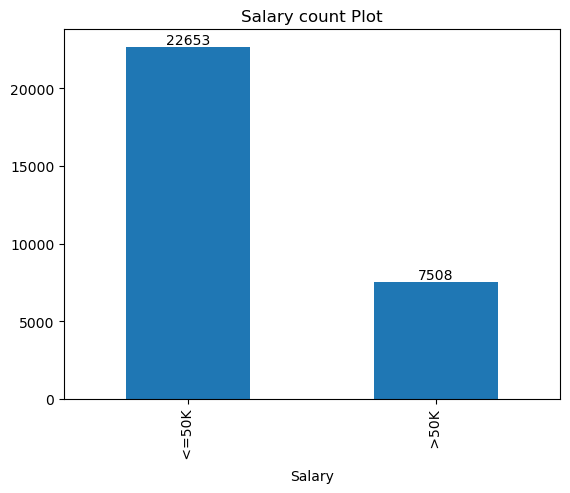

In [7]:
ax = df_train['Salary'].value_counts().plot(kind="bar")
plt.title("Salary count Plot")
for container in ax.containers:
    ax.bar_label(container)

# Data Preprocessing

### Identifying Missing Values

In [8]:
df_train.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [9]:
columns= df_train.columns
    
for col in df_train[columns]:
    print()
    print(col,)
    print(df_train[col].value_counts())


age
age
36    852
31    851
33    837
34    836
37    828
     ... 
82      7
83      5
88      3
85      3
86      1
Name: count, Length: 72, dtype: int64

workclass
workclass
 Private             22285
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: count, dtype: int64

education
education
 HS-grad         9840
 Some-college    6677
 Bachelors       5044
 Masters         1627
 Assoc-voc       1307
 11th            1048
 Assoc-acdm      1008
 10th             820
 7th-8th          557
 Prof-school      542
 9th              455
 12th             377
 Doctorate        375
 5th-6th          288
 1st-4th          151
 Preschool         45
Name: count, dtype: int64

educationno
educationno
9     9840
10    6677
13    5044
14    1627
11    1307
7     1048
12    1008
6      820
4      557
15     542
5      455
8      377
16     375
3      288
2      151
1       45
Name: c

In [10]:
df_train['capitalgain'].value_counts()

capitalgain
0        27623
15024      337
7688       270
7298       240
99999      148
         ...  
1639         1
6097         1
2538         1
1455         1
1086         1
Name: count, Length: 118, dtype: int64

## Encoding

In [11]:
Objectcol=df_train.select_dtypes(object).columns
Objectcol

Index(['workclass', 'education', 'maritalstatus', 'occupation', 'relationship',
       'race', 'sex', 'native', 'Salary'],
      dtype='object')

In [12]:
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder(dtype=int)

df_train[Objectcol]=oe.fit_transform(df_train[Objectcol])

In [13]:
oe.categories_

[array([' Federal-gov', ' Local-gov', ' Private', ' Self-emp-inc',
        ' Self-emp-not-inc', ' State-gov', ' Without-pay'], dtype=object),
 array([' 10th', ' 11th', ' 12th', ' 1st-4th', ' 5th-6th', ' 7th-8th',
        ' 9th', ' Assoc-acdm', ' Assoc-voc', ' Bachelors', ' Doctorate',
        ' HS-grad', ' Masters', ' Preschool', ' Prof-school',
        ' Some-college'], dtype=object),
 array([' Divorced', ' Married-AF-spouse', ' Married-civ-spouse',
        ' Married-spouse-absent', ' Never-married', ' Separated',
        ' Widowed'], dtype=object),
 array([' Adm-clerical', ' Armed-Forces', ' Craft-repair',
        ' Exec-managerial', ' Farming-fishing', ' Handlers-cleaners',
        ' Machine-op-inspct', ' Other-service', ' Priv-house-serv',
        ' Prof-specialty', ' Protective-serv', ' Sales', ' Tech-support',
        ' Transport-moving'], dtype=object),
 array([' Husband', ' Not-in-family', ' Other-relative', ' Own-child',
        ' Unmarried', ' Wife'], dtype=object),
 array(['

In [14]:
df_train.head()

age  workclass  education  educationno  maritalstatus  occupation  \
0   39          5          9           13              4           0   
1   50          4          9           13              2           3   
2   38          2         11            9              0           5   
3   53          2          1            7              2           5   
4   28          2          9           13              2           9   

   relationship  race  sex  capitalgain  capitalloss  hoursperweek  native  \
0             1     4    1         2174            0            40      37   
1             0     4    1            0            0            13      37   
2             1     4    1            0            0            40      37   
3             0     2    1            0            0            40      37   
4             5     2    0            0            0            40       4   

   Salary  
0       0  
1       0  
2       0  
3       0  
4       0

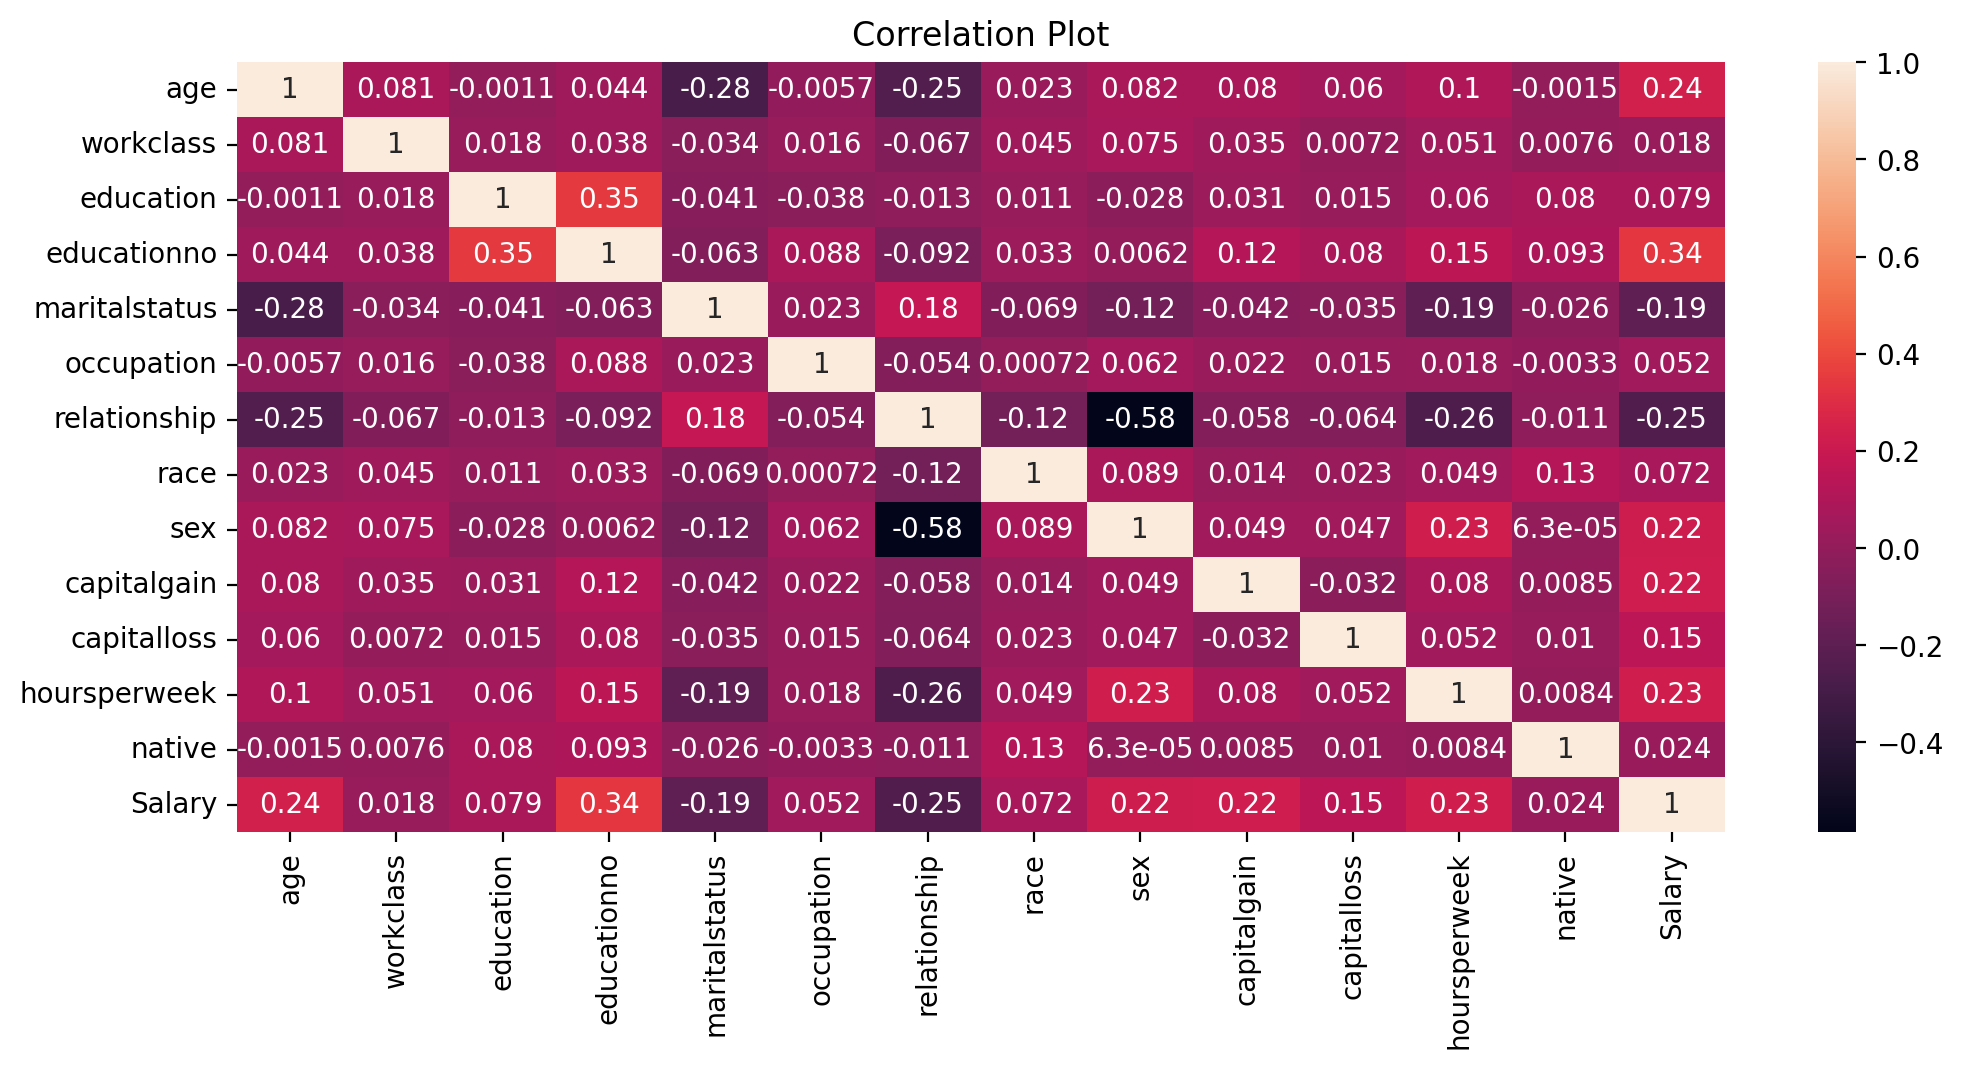

In [15]:
plt.figure(figsize=(12,5),dpi=200)
sns.heatmap(df_train.corr(),annot=True);
plt.title("Correlation Plot");

C:\Users\vijay\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


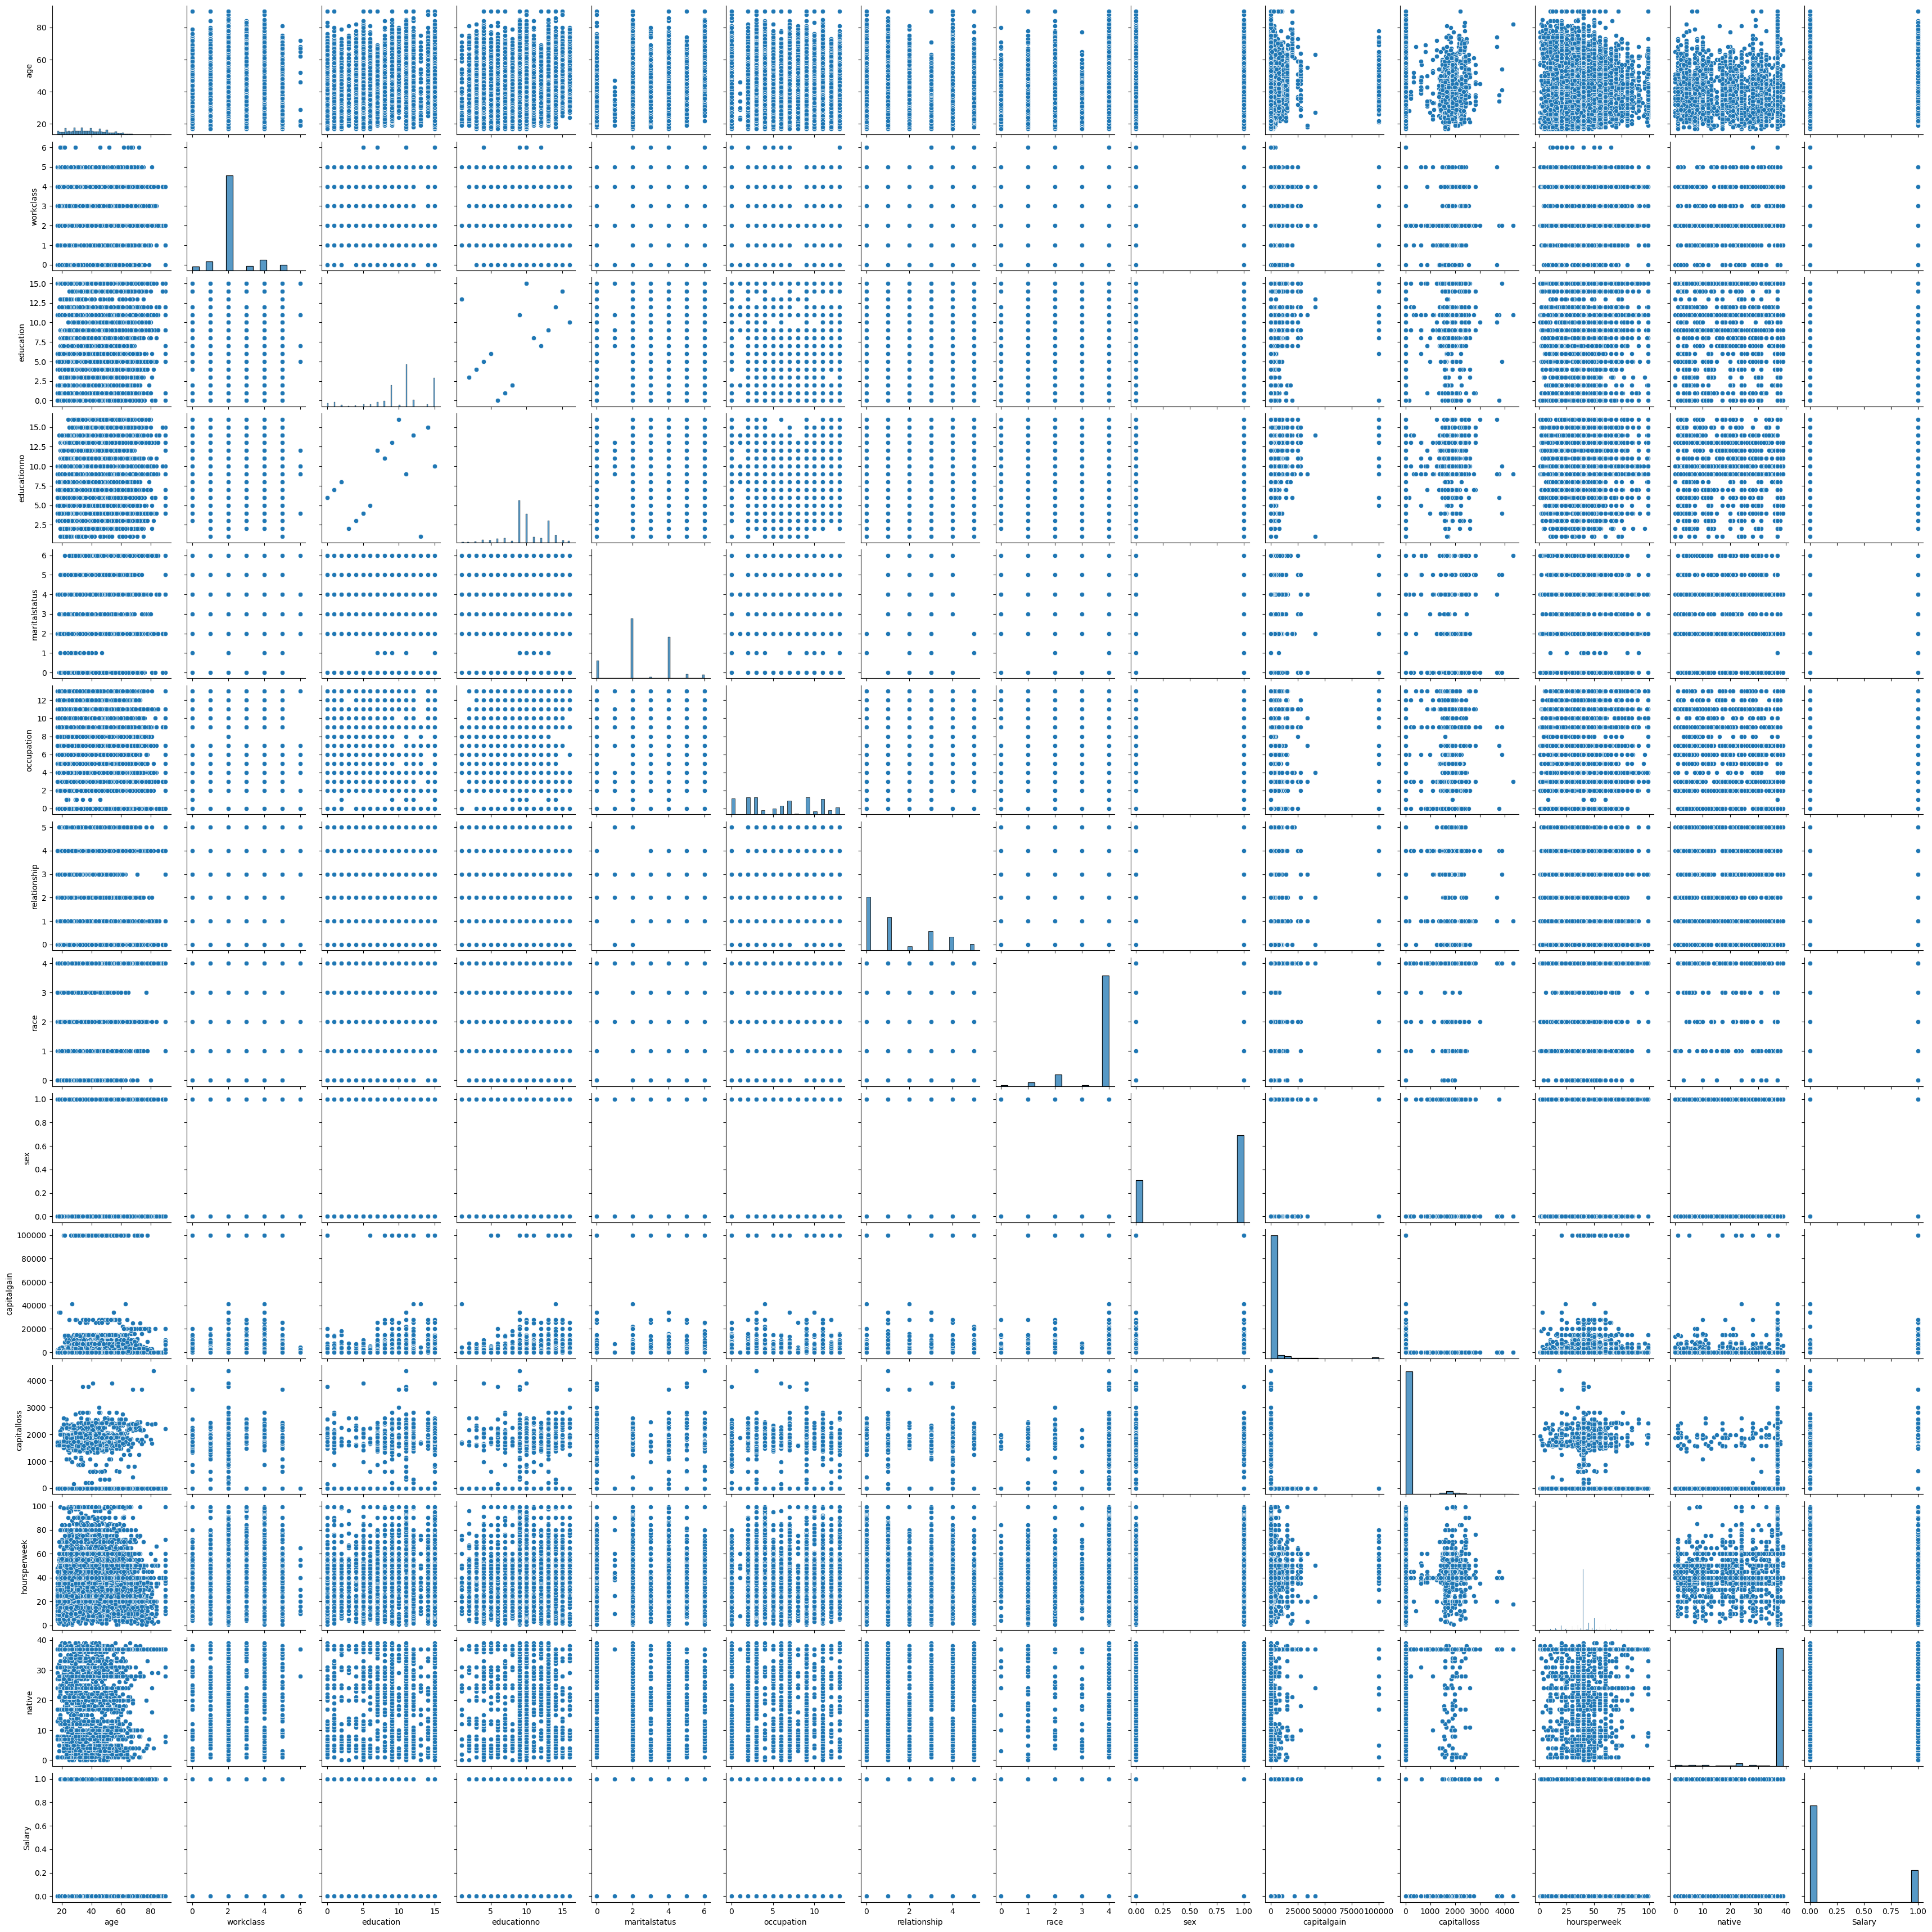

In [16]:
sns.pairplot(df_train);

## Testing DataFrame 

In [17]:
df_test=pd.read_csv('SalaryData_Test.csv')
df_test.head()

age   workclass      education  educationno        maritalstatus  \
0   25     Private           11th            7        Never-married   
1   38     Private        HS-grad            9   Married-civ-spouse   
2   28   Local-gov     Assoc-acdm           12   Married-civ-spouse   
3   44     Private   Some-college           10   Married-civ-spouse   
4   34     Private           10th            6        Never-married   

           occupation    relationship    race    sex  capitalgain  \
0   Machine-op-inspct       Own-child   Black   Male            0   
1     Farming-fishing         Husband   White   Male            0   
2     Protective-serv         Husband   White   Male            0   
3   Machine-op-inspct         Husband   Black   Male         7688   
4       Other-service   Not-in-family   White   Male            0   

   capitalloss  hoursperweek          native  Salary  
0            0            40   United-States   <=50K  
1            0            50   United-States   <=50K  
2            0            40   United-States    >50K  
3            0            40   United-States    >50K  
4            0            30   United-States   <=50K

### Quick Data Check

In [18]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


### Statistical Summary

In [19]:
df_test.describe()

age   educationno   capitalgain   capitalloss  hoursperweek
count  15060.000000  15060.000000  15060.000000  15060.000000  15060.000000
mean      38.768327     10.112749   1120.301594     89.041899     40.951594
std       13.380676      2.558727   7703.181842    406.283245     12.062831
min       17.000000      1.000000      0.000000      0.000000      1.000000
25%       28.000000      9.000000      0.000000      0.000000     40.000000
50%       37.000000     10.000000      0.000000      0.000000     40.000000
75%       48.000000     13.000000      0.000000      0.000000     45.000000
max       90.000000     16.000000  99999.000000   3770.000000     99.000000

In [20]:
df_test['Salary'].value_counts()

Salary
 <=50K    11360
 >50K      3700
Name: count, dtype: int64

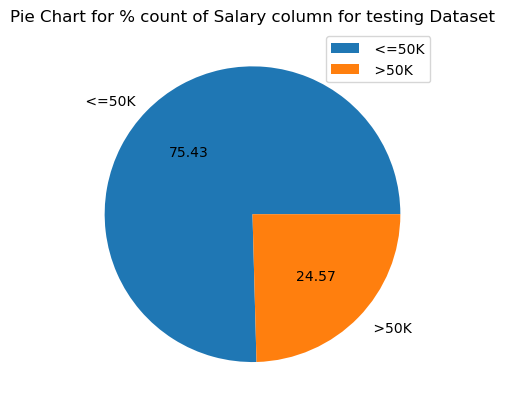

In [21]:
plt.pie(df_test['Salary'].value_counts(),autopct='%1.2f',labels=df_test['Salary'].value_counts().index);
plt.legend();
plt.title("Pie Chart for % count of Salary column for testing Dataset")
plt.show()

## Encoding

In [22]:
Objectcol=df_test.select_dtypes(object).columns
Objectcol

Index(['workclass', 'education', 'maritalstatus', 'occupation', 'relationship',
       'race', 'sex', 'native', 'Salary'],
      dtype='object')

In [23]:
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder(dtype=int)

df_test[Objectcol]=oe.fit_transform(df_test[Objectcol])

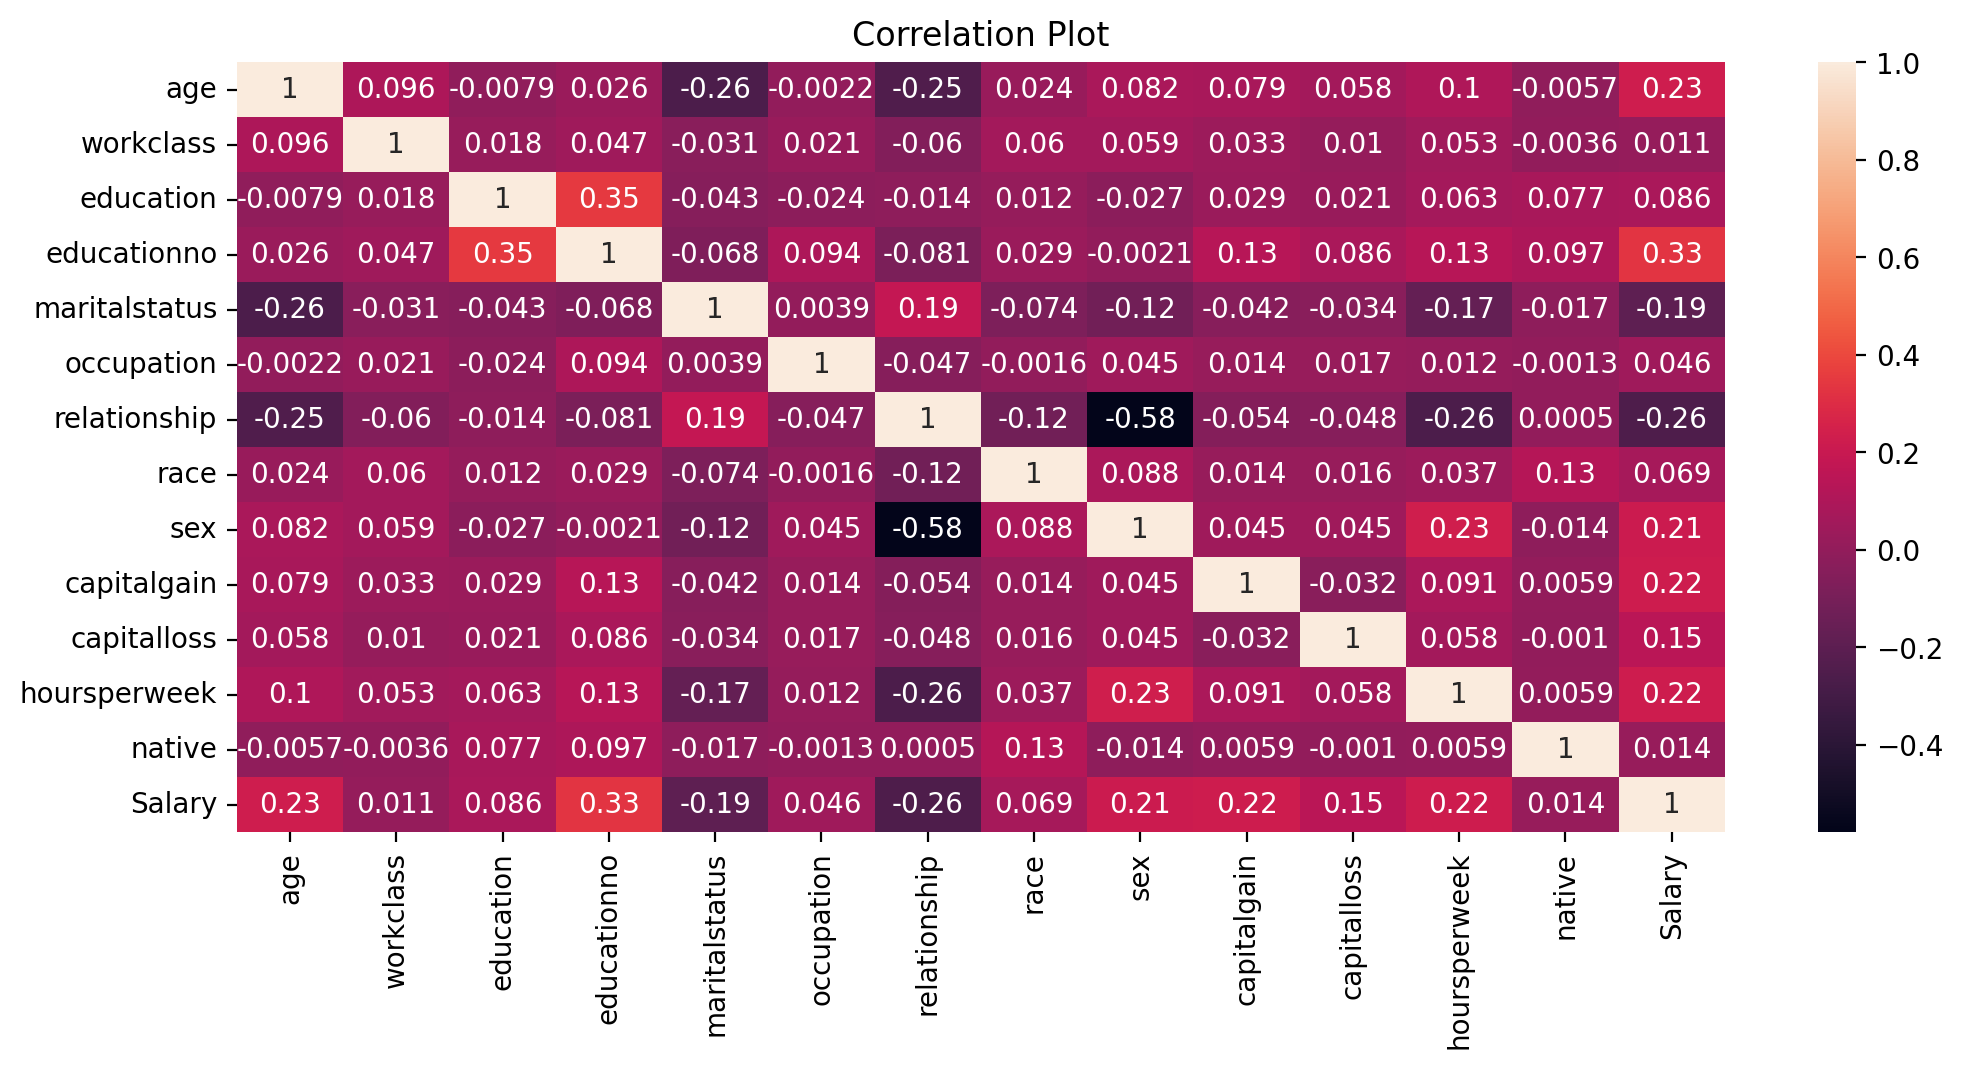

In [24]:
plt.figure(figsize=(12,5),dpi=200)
sns.heatmap(df_test.corr(),annot=True);
plt.title("Correlation Plot");

# Data Splitting

In [25]:
X_train=df_train.drop('Salary',axis=1)
y_train=df_train['Salary']

In [26]:
X_test=df_test.drop('Salary',axis=1)
y_test=df_test['Salary']

In [27]:
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test:",y_test.shape)

Shape of X_train:  (30161, 13)
Shape of X_test:  (15060, 13)
Shape of y_train:  (30161,)
Shape of y_test: (15060,)


# Feature Scaling

In [28]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()

X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

# Model Selection

In [29]:
from sklearn.svm import SVC

model = SVC()

model.fit(X_train,y_train)

SVC()

In [30]:
y_pred = model.predict(X_test)

In [31]:
y_pred

array([0, 0, 0, ..., 1, 0, 1])

# Model Evaluation

In [32]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [33]:
accuracy_score(y_test, y_pred)

0.845883134130146

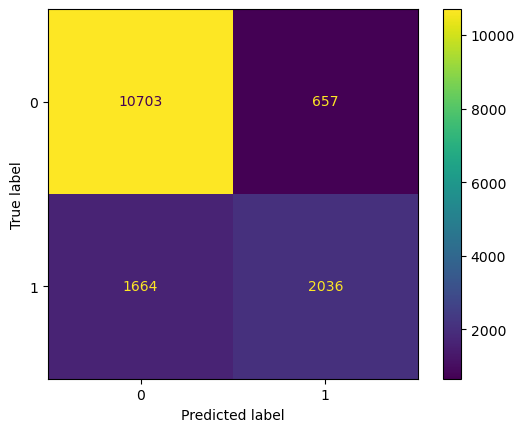

In [34]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=model.classes_).plot();

In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90     11360
           1       0.76      0.55      0.64      3700

    accuracy                           0.85     15060
   macro avg       0.81      0.75      0.77     15060
weighted avg       0.84      0.85      0.84     15060



# Grid Serach

In [36]:
from sklearn.model_selection import GridSearchCV

In [37]:
svm = SVC()

param_grid = {'C':[0.001,0.01,0.1,0.5,1],
             'kernel':['linear','rbf','poly'],
              'gamma':['scale','auto']}

grid = GridSearchCV(svm,param_grid,verbose=3)

In [38]:
grid = GridSearchCV(svm,param_grid)

In [39]:
grid.fit(X_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']})

In [40]:
grid.best_params_

{'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}

In [41]:
grid_preds = grid.predict(X_test)

In [42]:
accuracy_score(y_test, grid_preds)

0.845883134130146

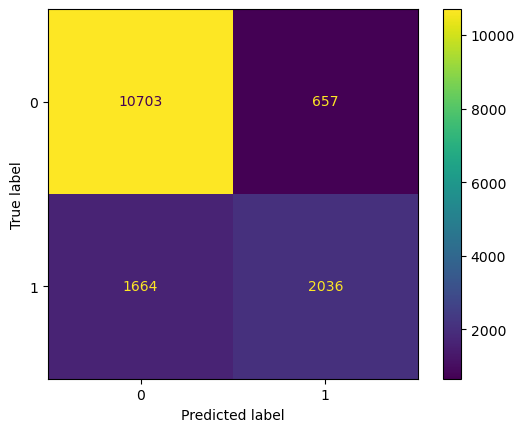

In [43]:
ConfusionMatrixDisplay(confusion_matrix(y_test, grid_preds), display_labels=model.classes_).plot();

In [44]:
print(classification_report(y_test,grid_preds))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90     11360
           1       0.76      0.55      0.64      3700

    accuracy                           0.85     15060
   macro avg       0.81      0.75      0.77     15060
weighted avg       0.84      0.85      0.84     15060



In [45]:
svc_model = SVC(C=1, gamma='auto', kernel='rbf')

In [46]:
svc_model.fit(X_train,y_train)

SVC(C=1, gamma='auto')

# Retrain Model

In [47]:
final_svc = SVC(C=1.0, gamma='auto', kernel='rbf')

In [49]:
final_svc.fit(X_train,y_train)

SVC(gamma='auto')

In [51]:
y_pred = final_svc.predict(X_test)

# Model Evaluation

In [52]:
accuracy_score(y_test, y_pred)

0.845883134130146

In [53]:
confusion_matrix(y_test, y_pred)

array([[10703,   657],
       [ 1664,  2036]], dtype=int64)

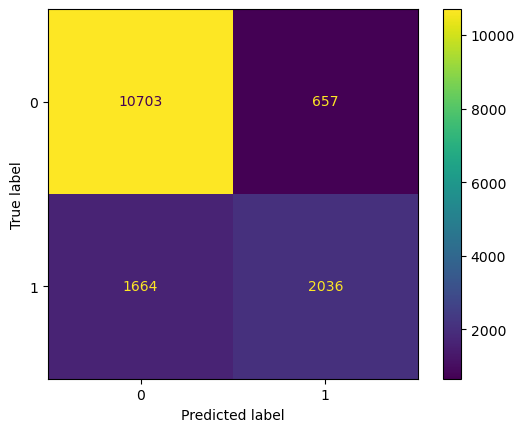

In [55]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=final_svc.classes_).plot();

In [56]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90     11360
           1       0.76      0.55      0.64      3700

    accuracy                           0.85     15060
   macro avg       0.81      0.75      0.77     15060
weighted avg       0.84      0.85      0.84     15060



# Model Deployment

In [57]:
# from joblib import dump,load

In [58]:
# dump(final_svc, 'final_svc.joblib')